<a href="https://colab.research.google.com/github/fahrulrozi11/Machine-Learning/blob/main/6.%20Week%206/Clustering_Campaign_Data_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Load Data

In [1]:
import pandas as pd
import requests
from io import StringIO

# Load dataset from URL with tab delimiter
url = 'https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/06.%20Week%206/Datasets/clusteringcampaign.csv'
response = requests.get(url)
data = pd.read_csv(StringIO(response.text), sep='\t')

# Display dataset information and first few rows
print(data.info())
print(data.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#2. Preprocessing Data

In [2]:
from sklearn.preprocessing import StandardScaler

# Define the list of numeric columns
numeric_cols = [
    'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
    'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain',
    'Z_CostContact', 'Z_Revenue', 'Response'
]

# Convert columns to numeric, coercing errors to NaN
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with missing values
data_cleaned = data[numeric_cols].dropna()

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
data_scaled = scaler.fit_transform(data_cleaned)

# Display the shape of the scaled data
print("Shape of the standardized data:", data_scaled.shape)



Shape of the standardized data: (2216, 25)


#2. Membuat Model Clustering


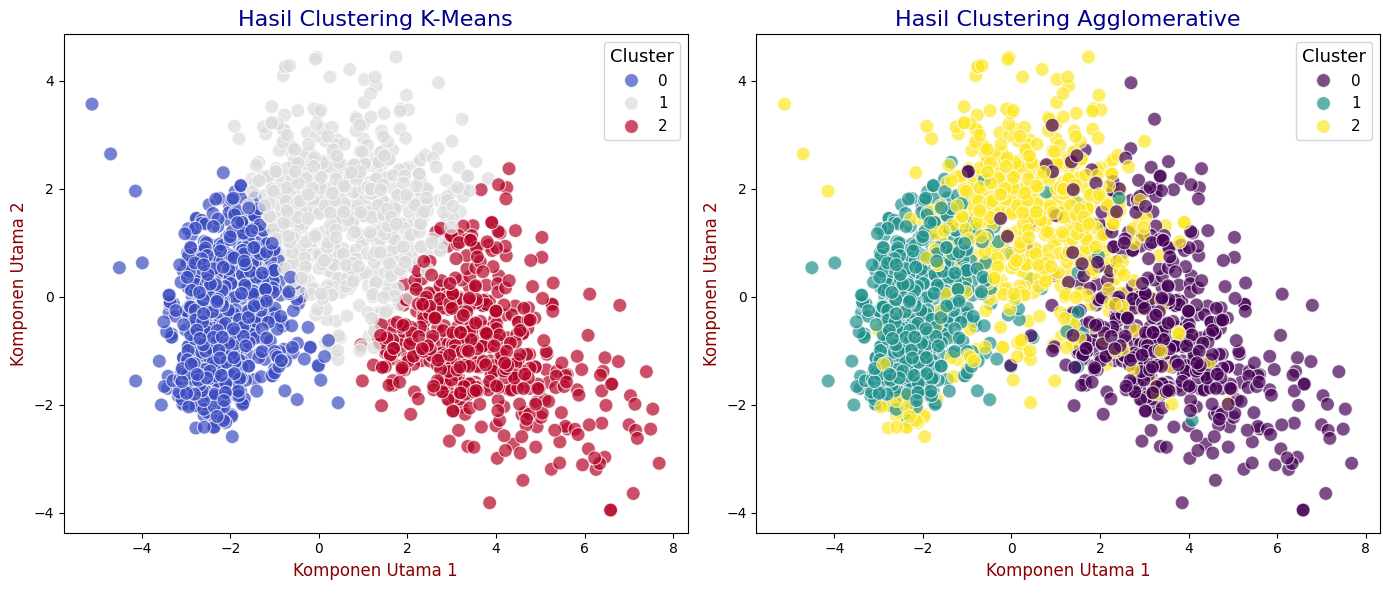

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering

# Misalkan data_scaled adalah data yang telah distandarisasi

# Inisialisasi model clustering
kmeans = KMeans(n_clusters=3, random_state=42)
agglo = AgglomerativeClustering(n_clusters=3)

# Fit model dan prediksi label
labels_kmeans = kmeans.fit_predict(data_scaled)
labels_agglo = agglo.fit_predict(data_scaled)

# Reduksi dimensi data ke 2D menggunakan PCA
pca = PCA(n_components=2, random_state=42)
data_pca = pca.fit_transform(data_scaled)

# Visualisasi hasil clustering
plt.figure(figsize=(14, 6))

# Subplot 1: Hasil K-Means
plt.subplot(1, 2, 1)
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=labels_kmeans, palette='coolwarm', s=100, alpha=0.7)
plt.title("Hasil Clustering K-Means", fontsize=16, color='darkblue')
plt.xlabel("Komponen Utama 1", fontsize=12, color='darkred')
plt.ylabel("Komponen Utama 2", fontsize=12, color='darkred')
plt.legend(title='Cluster', title_fontsize='13', fontsize='11')

# Subplot 2: Hasil Agglomerative Clustering
plt.subplot(1, 2, 2)
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=labels_agglo, palette='viridis', s=100, alpha=0.7)
plt.title("Hasil Clustering Agglomerative", fontsize=16, color='darkblue')
plt.xlabel("Komponen Utama 1", fontsize=12, color='darkred')
plt.ylabel("Komponen Utama 2", fontsize=12, color='darkred')
plt.legend(title='Cluster', title_fontsize='13', fontsize='11')

# Menyesuaikan layout dan menampilkan plot
plt.tight_layout()
plt.show()


#3. Menghitung Matriks Cluster


## Elbow Methode

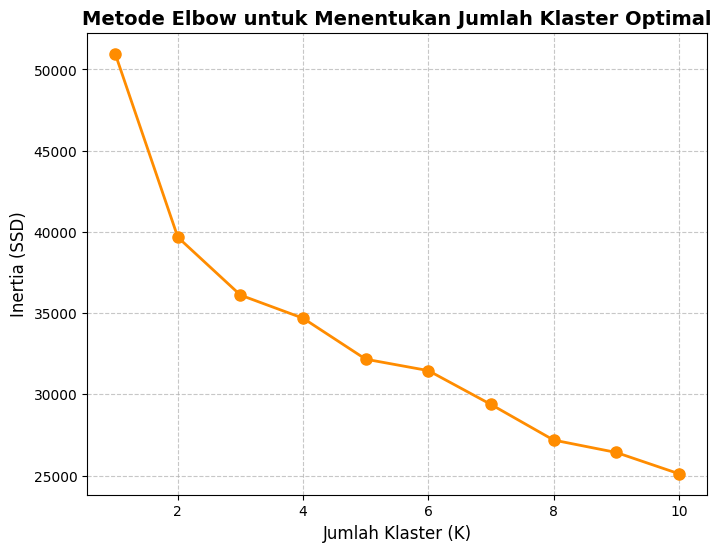

In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Misalkan data_scaled adalah data yang telah distandarisasi

# Hitung inertia untuk berbagai jumlah klaster
inertia = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(data_scaled)
    inertia.append(km.inertia_)

# Visualisasi metode Elbow dengan penyesuaian warna dan gaya grafik
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, marker='o', color='darkorange', linestyle='-', linewidth=2, markersize=8)
plt.title('Metode Elbow untuk Menentukan Jumlah Klaster Optimal', fontsize=14, fontweight='bold')
plt.xlabel('Jumlah Klaster (K)', fontsize=12)
plt.ylabel('Inertia (SSD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



## Silhouette Coefficient

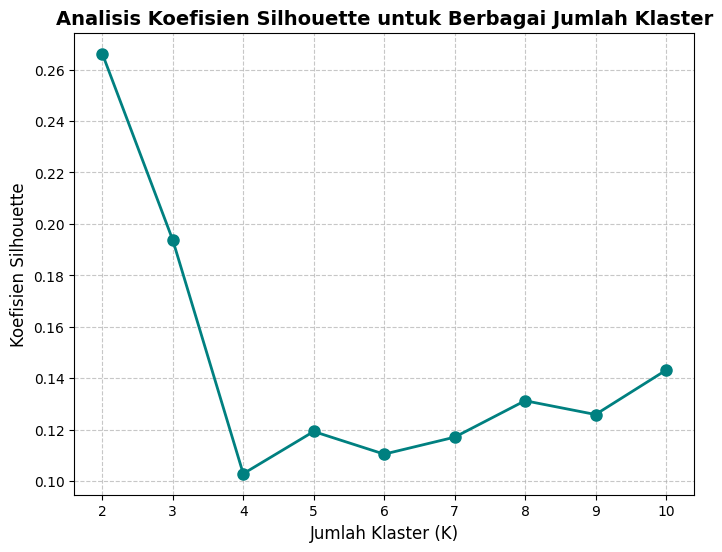

In [16]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Misalkan data_scaled adalah data yang telah distandarisasi

# Hitung koefisien Silhouette untuk berbagai jumlah klaster
silhouette_scores = []
K = range(2, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, labels)
    silhouette_scores.append(score)

# Visualisasi koefisien Silhouette dengan penyesuaian warna dan gaya grafik
plt.figure(figsize=(8, 6))
plt.plot(K, silhouette_scores, marker='o', color='teal', linestyle='-', linewidth=2, markersize=8)
plt.title('Analisis Koefisien Silhouette untuk Berbagai Jumlah Klaster', fontsize=14, fontweight='bold')
plt.xlabel('Jumlah Klaster (K)', fontsize=12)
plt.ylabel('Koefisien Silhouette', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(K)
plt.show()



##Calinski-Harabasz Index

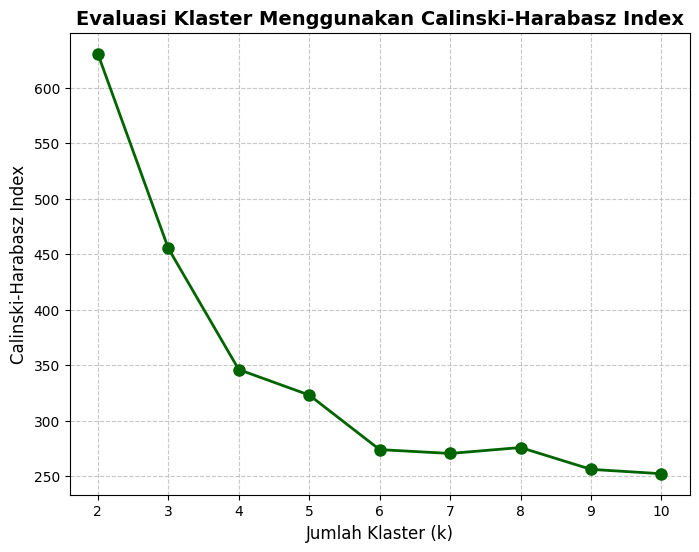

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt

# Misalkan data_scaled adalah data yang telah distandarisasi

# Hitung Calinski-Harabasz Index untuk berbagai jumlah klaster
ch_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    score = calinski_harabasz_score(data_scaled, labels)
    ch_scores.append(score)

# Visualisasi Calinski-Harabasz Index
plt.figure(figsize=(8, 6))
plt.plot(K, ch_scores, marker='o', color='darkgreen', linestyle='-', linewidth=2, markersize=8)
plt.title('Evaluasi Klaster Menggunakan Calinski-Harabasz Index', fontsize=14, fontweight='bold')
plt.xlabel('Jumlah Klaster (k)', fontsize=12)
plt.ylabel('Calinski-Harabasz Index', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(K)
plt.show()


##Dunn Index

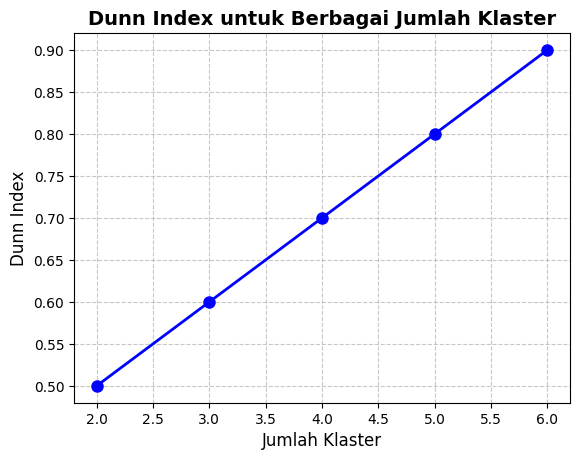

In [19]:
import matplotlib.pyplot as plt

# Misalkan dunn_scores adalah daftar nilai Dunn Index untuk berbagai jumlah klaster
dunn_scores = [0.5, 0.6, 0.7, 0.8, 0.9]

plt.plot(range(2, 7), dunn_scores, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.title('Dunn Index untuk Berbagai Jumlah Klaster', fontsize=14, fontweight='bold')
plt.xlabel('Jumlah Klaster', fontsize=12)
plt.ylabel('Dunn Index', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



Berikut adalah penjelasan ulang mengenai evaluasi clustering, disertai rumus-rumus yang relevan:

---

## 📊 Evaluasi Clustering

Evaluasi clustering bertujuan untuk menilai kualitas hasil pengelompokan data tanpa label. Berikut adalah beberapa metrik yang umum digunakan:

---

### 1. Metode Elbow (SSE)

Metode Elbow digunakan untuk menentukan jumlah klaster optimal dengan menghitung nilai inertia (SSE) untuk berbagai jumlah klaster. Inertia mengukur seberapa baik data dalam klaster terpisah dari klaster lainnya.

Rumusnya adalah:

$$
\text{Inertia} = \sum_{k=1}^{K} \sum_{x_i \in C_k} \|x_i - \mu_k\|^2
$$

- \( K \): jumlah klaster
- \( C_k \): himpunan titik dalam klaster ke-\(k\)
- \( \mu_k \): pusat (mean) dari klaster ke-\(k\)

Titik "elbow" pada grafik menunjukkan jumlah klaster yang optimal.

---

### 2. Koefisien Silhouette

Koefisien Silhouette mengukur seberapa mirip setiap titik dengan klaster-nya dibandingkan dengan klaster lain. Nilai koefisien ini berkisar antara -1 hingga +1, dengan nilai mendekati +1 menunjukkan pemisahan klaster yang baik.

Rumusnya adalah:

$$
s(i) = \frac{b(i) - a(i)}{\max \{ a(i), b(i) \}}
$$

- \( a(i) \): jarak rata-rata titik \(i\) ke semua titik lain dalam klaster yang sama
- \( b(i) \): jarak rata-rata titik \(i\) ke semua titik dalam klaster terdekat yang berbeda

---

### 3. Indeks Calinski-Harabasz

Indeks ini mengukur rasio antara dispersi antar-klaster dan dispersi dalam-klaster. Nilai indeks yang lebih tinggi menunjukkan klaster yang lebih terpisah dan padat.

Rumusnya adalah:

$$
CH = \frac{\text{Between-Cluster Dispersion}}{\text{Within-Cluster Dispersion}} \times \frac{N - k}{k - 1}
$$

- \( N \): jumlah total data
- \( k \): jumlah klaster

---

### 4. Indeks Dunn

Indeks Dunn mendefinisikan kualitas clustering dengan mengambil rasio antara jarak antar-klaster minimum dan diameter maksimal di antara setiap klaster.

Rumusnya adalah:

$$
\text{Dunn} = \frac{\min_{i \neq j} \; \delta(C_i,C_j)}{\max_{1 \leq k \leq K} \; \Delta(C_k)}
$$

- \( \delta(C_i,C_j) \): jarak minimum antara titik dari klaster \(C_i\) dan \(C_j\)
- \( \Delta(C_k) \): diameter klaster \(C_k\), yakni jarak maksimum antara dua titik dalam klaster yang sama

---

## ✅ Kesimpulan

- **Metode Elbow** membantu menentukan jumlah klaster dengan menganalisis perubahan inertia, namun kurang eksplisit dalam memberi batasan untuk klaster yang “baik”.
- **Koefisien Silhouette** sangat populer karena mengkombinasikan informasi intra- dan inter-klaster serta mudah diinterpretasi.
- **Indeks Calinski-Harabasz** juga banyak digunakan karena sederhana dan cepat.
- **Indeks Dunn** memberikan gambaran yang sangat jelas mengenai pemisahan dan kompaksi klaster, tetapi terkadang sulit untuk dihitung pada dataset besar.

Dalam praktiknya, **Koefisien Silhouette** sering dijadikan patokan karena memberikan nilai yang relatif mudah dipahami, sementara **Indeks Calinski-Harabasz** bisa dipakai sebagai konfirmasi tambahan.

---

Jika Anda memerlukan bantuan lebih lanjut atau penjelasan tambahan, silakan ditanyakan!
